In [1]:
# import library
import pandas as pd
from scipy.stats import trim_mean

In [2]:
# import data
state = pd.read_csv("../data/state.csv")
state.head(20)

State  Population  Murder.Rate Abbreviation
0       Alabama     4779736          5.7           AL
1        Alaska      710231          5.6           AK
2       Arizona     6392017          4.7           AZ
3      Arkansas     2915918          5.6           AR
4    California    37253956          4.4           CA
5      Colorado     5029196          2.8           CO
6   Connecticut     3574097          2.4           CT
7      Delaware      897934          5.8           DE
8       Florida    18801310          5.8           FL
9       Georgia     9687653          5.7           GA
10       Hawaii     1360301          1.8           HI
11        Idaho     1567582          2.0           ID
12     Illinois    12830632          5.3           IL
13      Indiana     6483802          5.0           IN
14         Iowa     3046355          1.9           IA
15       Kansas     2853118          3.1           KS
16     Kentucky     4339367          3.6           KY
17    Louisiana     4533372         10.3           LA
18        Maine     1328361          1.6           ME
19     Maryland     5773552          6.1           MD

In [3]:
# calculate mean
mean_popul = state['Population'].mean()
# calculate truncated mean
truncated_mean_popul = trim_mean(state['Population'], 0.1)
# median
median_popol = state['Population'].median()
    
print("mean:                   {}\ntruncated_mean_populat: {}\nmedian_popul:           {}".format(mean_popul, 
                                                                                          truncated_mean_popul, median_popol))

mean:                   6162876.3
truncated_mean_populat: 4783697.125
median_popul:           4436369.5


### Оценка вариабельности населения штатов

In [11]:
x = state["Population"].std()
print("Стандартное отклонение: {}".format(x.round(2)))

Стандартное отклонение: 6848235.35


In [4]:
x = state["Population"].quantile(0.75) - state["Population"].quantile(0.25)
print("Межквартальных размах (IQR): {}".format(x))

Межквартальных размах (IQR): 4847308.0


In [5]:
from statsmodels import robust
x = statsmodels.robust.scale.mad(state["Population"])
print("Медианное абсолютное отклонение (Median Absolute Deviation): {}".format(x.round(2)))

NameError: name 'statsmodels' is not defined

###  Разведочный  анализ данных

Text(0, 0.5, 'Население, млн чел')

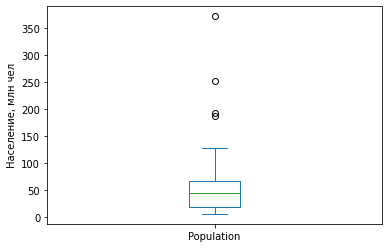

In [6]:
# boxplot
ax = (state["Population"]/100000).plot.box()
ax.set_ylabel("Население, млн чел")

In [7]:
# Частотная таблица по популяциии
binnedPopulation = pd.cut(state["Population"], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Численнось населения')

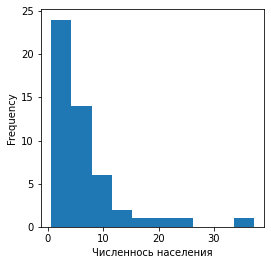

In [14]:
# Build hist of Population
import matplotlib.pyplot as plt
ax = (state['Population'] / 1000000).plot.hist(figsize = (4, 4))
ax.set_xlabel("Численнось населения")

Text(0.5, 17.200000000000003, 'Уровень убийств на 100 тыс. населения')

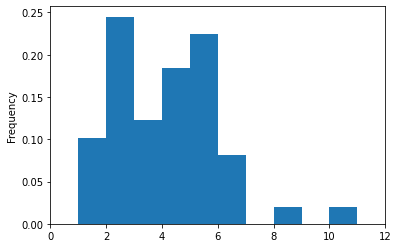

In [16]:
state["Murder.Rate"].plot.hist(density = True, xlim = [0, 12], bins=range(1, 12))
# state["Murder.Rate"].plot.density(ax = ax)
ax.set_xlabel("Уровень убийств на 100 тыс. населения")

In [21]:
dfw = pd.DataFrame({'Carrier':[23.02], 'ATC': [30.40], 'Weather': [4.03], 'Security': [0.12], 'Inbound': [42.43]})
dfw.head()

Carrier   ATC  Weather  Security  Inbound
0    23.02  30.4     4.03      0.12    42.43

Text(0, 0.5, 'Количество')

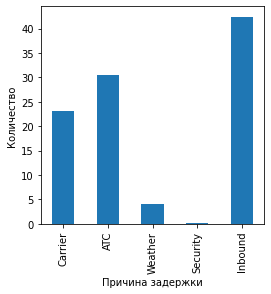

In [23]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend = False)
ax.set_xlabel("Причина задержки")
ax.set_ylabel("Количество")